In [41]:
import numpy as np
from scipy.sparse import lil_matrix
import scipy.sparse
import matplotlib.pyplot as plt
import networkx as nx
from tfgraph import *

### Trend Filtering:
$$
\beta = \underset{\beta \in \mathbb{R}^n}{\arg\min} \left( \frac{1}{2} \| y - \beta \|_2^2 + \lambda \| D^{(k+1)} \beta \|_1 \right)
$$
- λ ≥ 0 is a tuning parameter.
- $D^{(k+1)}$ is the discrete difference operator of order k + 1.
$$
D^{(1)} = 
\begin{pmatrix}
-1 & 1  & 0  & \cdots & 0 \\
 0 & -1 & 1  & \cdots & 0 \\
 \vdots & \vdots & \vdots & \ddots & \vdots \\
 0 & 0  & \cdots & -1 & 1 \\
\end{pmatrix}
$$
$
D^{(k+1) }= D^{(1)} D^{(k)}
$
### Trend Filtering on Graphs:
$$
\hat{\beta} = \underset{\beta \in \mathbb{R}^n}{\arg\min} \left( \frac{1}{2} \| y - \beta \|_2^2 + \lambda \| \Delta^{(k+1)} \beta \|_1 \right)
$$
The penalty matrix $\Delta^{(k+1)}$ is a suitably defined graph difference operator, of order $k + 1$.


##### Generate L, D, $\Delta$
- $
    \Delta^{(k+1)} = 
    \begin{cases} 
    (\Delta^{(1)})^\top \Delta^{(k)} = L^{\frac{k+1}{2}} & \text{for odd } k, \\
    \Delta^{(1)} \Delta^{(k)} = D L^{\frac{k}{2}} & \text{for even } k.
    \end{cases}
    $
- $L$: Graph Laplacian Matrix, $ L = D - A $.
    - $ D $: degree matrix, a diagonal matrix where the diagonal element $ D_{ii} $ represents the degree of node $ i $ (i.e., the number of edges connected to node $ i $ ).
    - $ A $: adjacency matrix, where $A_{ij} = 1 $ indicates that there is an edge between nodes $ i $ and $j$.

- Note that , order = "F" when flatten the image





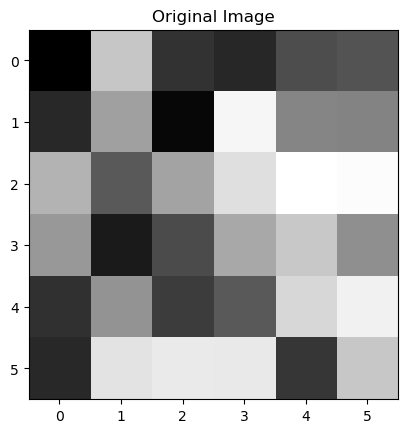

In [42]:
m=6
n=6
k=3
image = np.random.rand(m, n)  # 生成一个 mxn 的随机图片
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Generate L, D, \Delta
L = generate_L(image)
D = generate_D(image)
delta=generate_delta(D, L, k)


In [43]:
def print_nonzero_columns(matrix):
    nonzero_columns = []
    for i, row in enumerate(matrix):
        # 获取当前行中非零元素的列索引
        nonzero_columns.append(np.nonzero(row)[0].tolist())
    return nonzero_columns

In [44]:
rows=[]
rows=print_nonzero_columns(delta)
rows #nonzero columns of delta

[[0, 1, 2, 6, 7],
 [0, 1, 6, 7, 12],
 [0, 1, 2, 3, 7, 8],
 [0, 1, 2, 6, 7, 8, 13],
 [1, 2, 3, 4, 8, 9],
 [1, 2, 3, 7, 8, 9, 14],
 [2, 3, 4, 5, 9, 10],
 [2, 3, 4, 8, 9, 10, 15],
 [3, 4, 5, 10, 11],
 [3, 4, 5, 9, 10, 11, 16],
 [4, 5, 10, 11, 17],
 [0, 1, 6, 7, 8, 12, 13],
 [0, 6, 7, 12, 13, 18],
 [1, 2, 6, 7, 8, 9, 13, 14],
 [1, 6, 7, 8, 12, 13, 14, 19],
 [2, 3, 7, 8, 9, 10, 14, 15],
 [2, 7, 8, 9, 13, 14, 15, 20],
 [3, 4, 8, 9, 10, 11, 15, 16],
 [3, 8, 9, 10, 14, 15, 16, 21],
 [4, 5, 9, 10, 11, 16, 17],
 [4, 9, 10, 11, 15, 16, 17, 22],
 [5, 10, 11, 16, 17, 23],
 [6, 7, 12, 13, 14, 18, 19],
 [6, 12, 13, 18, 19, 24],
 [7, 8, 12, 13, 14, 15, 19, 20],
 [7, 12, 13, 14, 18, 19, 20, 25],
 [8, 9, 13, 14, 15, 16, 20, 21],
 [8, 13, 14, 15, 19, 20, 21, 26],
 [9, 10, 14, 15, 16, 17, 21, 22],
 [9, 14, 15, 16, 20, 21, 22, 27],
 [10, 11, 15, 16, 17, 22, 23],
 [10, 15, 16, 17, 21, 22, 23, 28],
 [11, 16, 17, 22, 23, 29],
 [12, 13, 18, 19, 20, 24, 25],
 [12, 18, 19, 24, 25, 30],
 [13, 14, 18, 19, 20, 21, 

### attempt of partition using reverse algorithm  
This process takes a lot of time and may not have result.

In [45]:
'''
from collections import Counter
# 扁平化列表，并使用 Counter 计算每个元素出现的次数
flat_list = [item for sublist in rows for item in sublist]
element_count = Counter(flat_list)
# 获取元素出现的最多次数及其对应的元素
most_common_element, most_common_count = element_count.most_common(1)[0]
print(f"\nElement {most_common_element} appears the most with {most_common_count} times")
'''

'\nfrom collections import Counter\n# 扁平化列表，并使用 Counter 计算每个元素出现的次数\nflat_list = [item for sublist in rows for item in sublist]\nelement_count = Counter(flat_list)\n# 获取元素出现的最多次数及其对应的元素\nmost_common_element, most_common_count = element_count.most_common(1)[0]\nprint(f"\nElement {most_common_element} appears the most with {most_common_count} times")\n'

In [46]:
#max_part = most_common_count  # 这里可以更改 max_part 的值
max_part=16
partitions, row_indices = divide_rows_into_partitions(rows, max_part=max_part)

# 计算每个分区的唯一列集合
if partitions:
    partition_columns = get_partition_columns(partitions)
    for i, (indices, columns) in enumerate(zip(row_indices, partition_columns)):
        print(f"Partition {i + 1}: Row indices used = {indices}")
        print(f"  Columns: {columns}\n")
else:
    print(f"无法将行分配到 {max_part} 个不重复的分区。")

Partition 1: Row indices used = [0, 8, 26, 44, 52]
  Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35]

Partition 2: Row indices used = [1, 6, 27, 45, 53]
  Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35]

Partition 3: Row indices used = [2, 10, 23, 29, 54, 56]
  Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

Partition 4: Row indices used = [3, 9, 37, 55, 59]
  Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

Partition 5: Row indices used = [4, 12, 30, 38]
  Columns: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 32]

Partition 6: Row indices used = [5, 31, 33, 57]
  Columns: [1, 2, 3, 7, 8, 9, 10, 12, 13, 14, 1

/tmp/ipykernel_2216248/3393877868.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in row_indices))  # 为行分配颜色


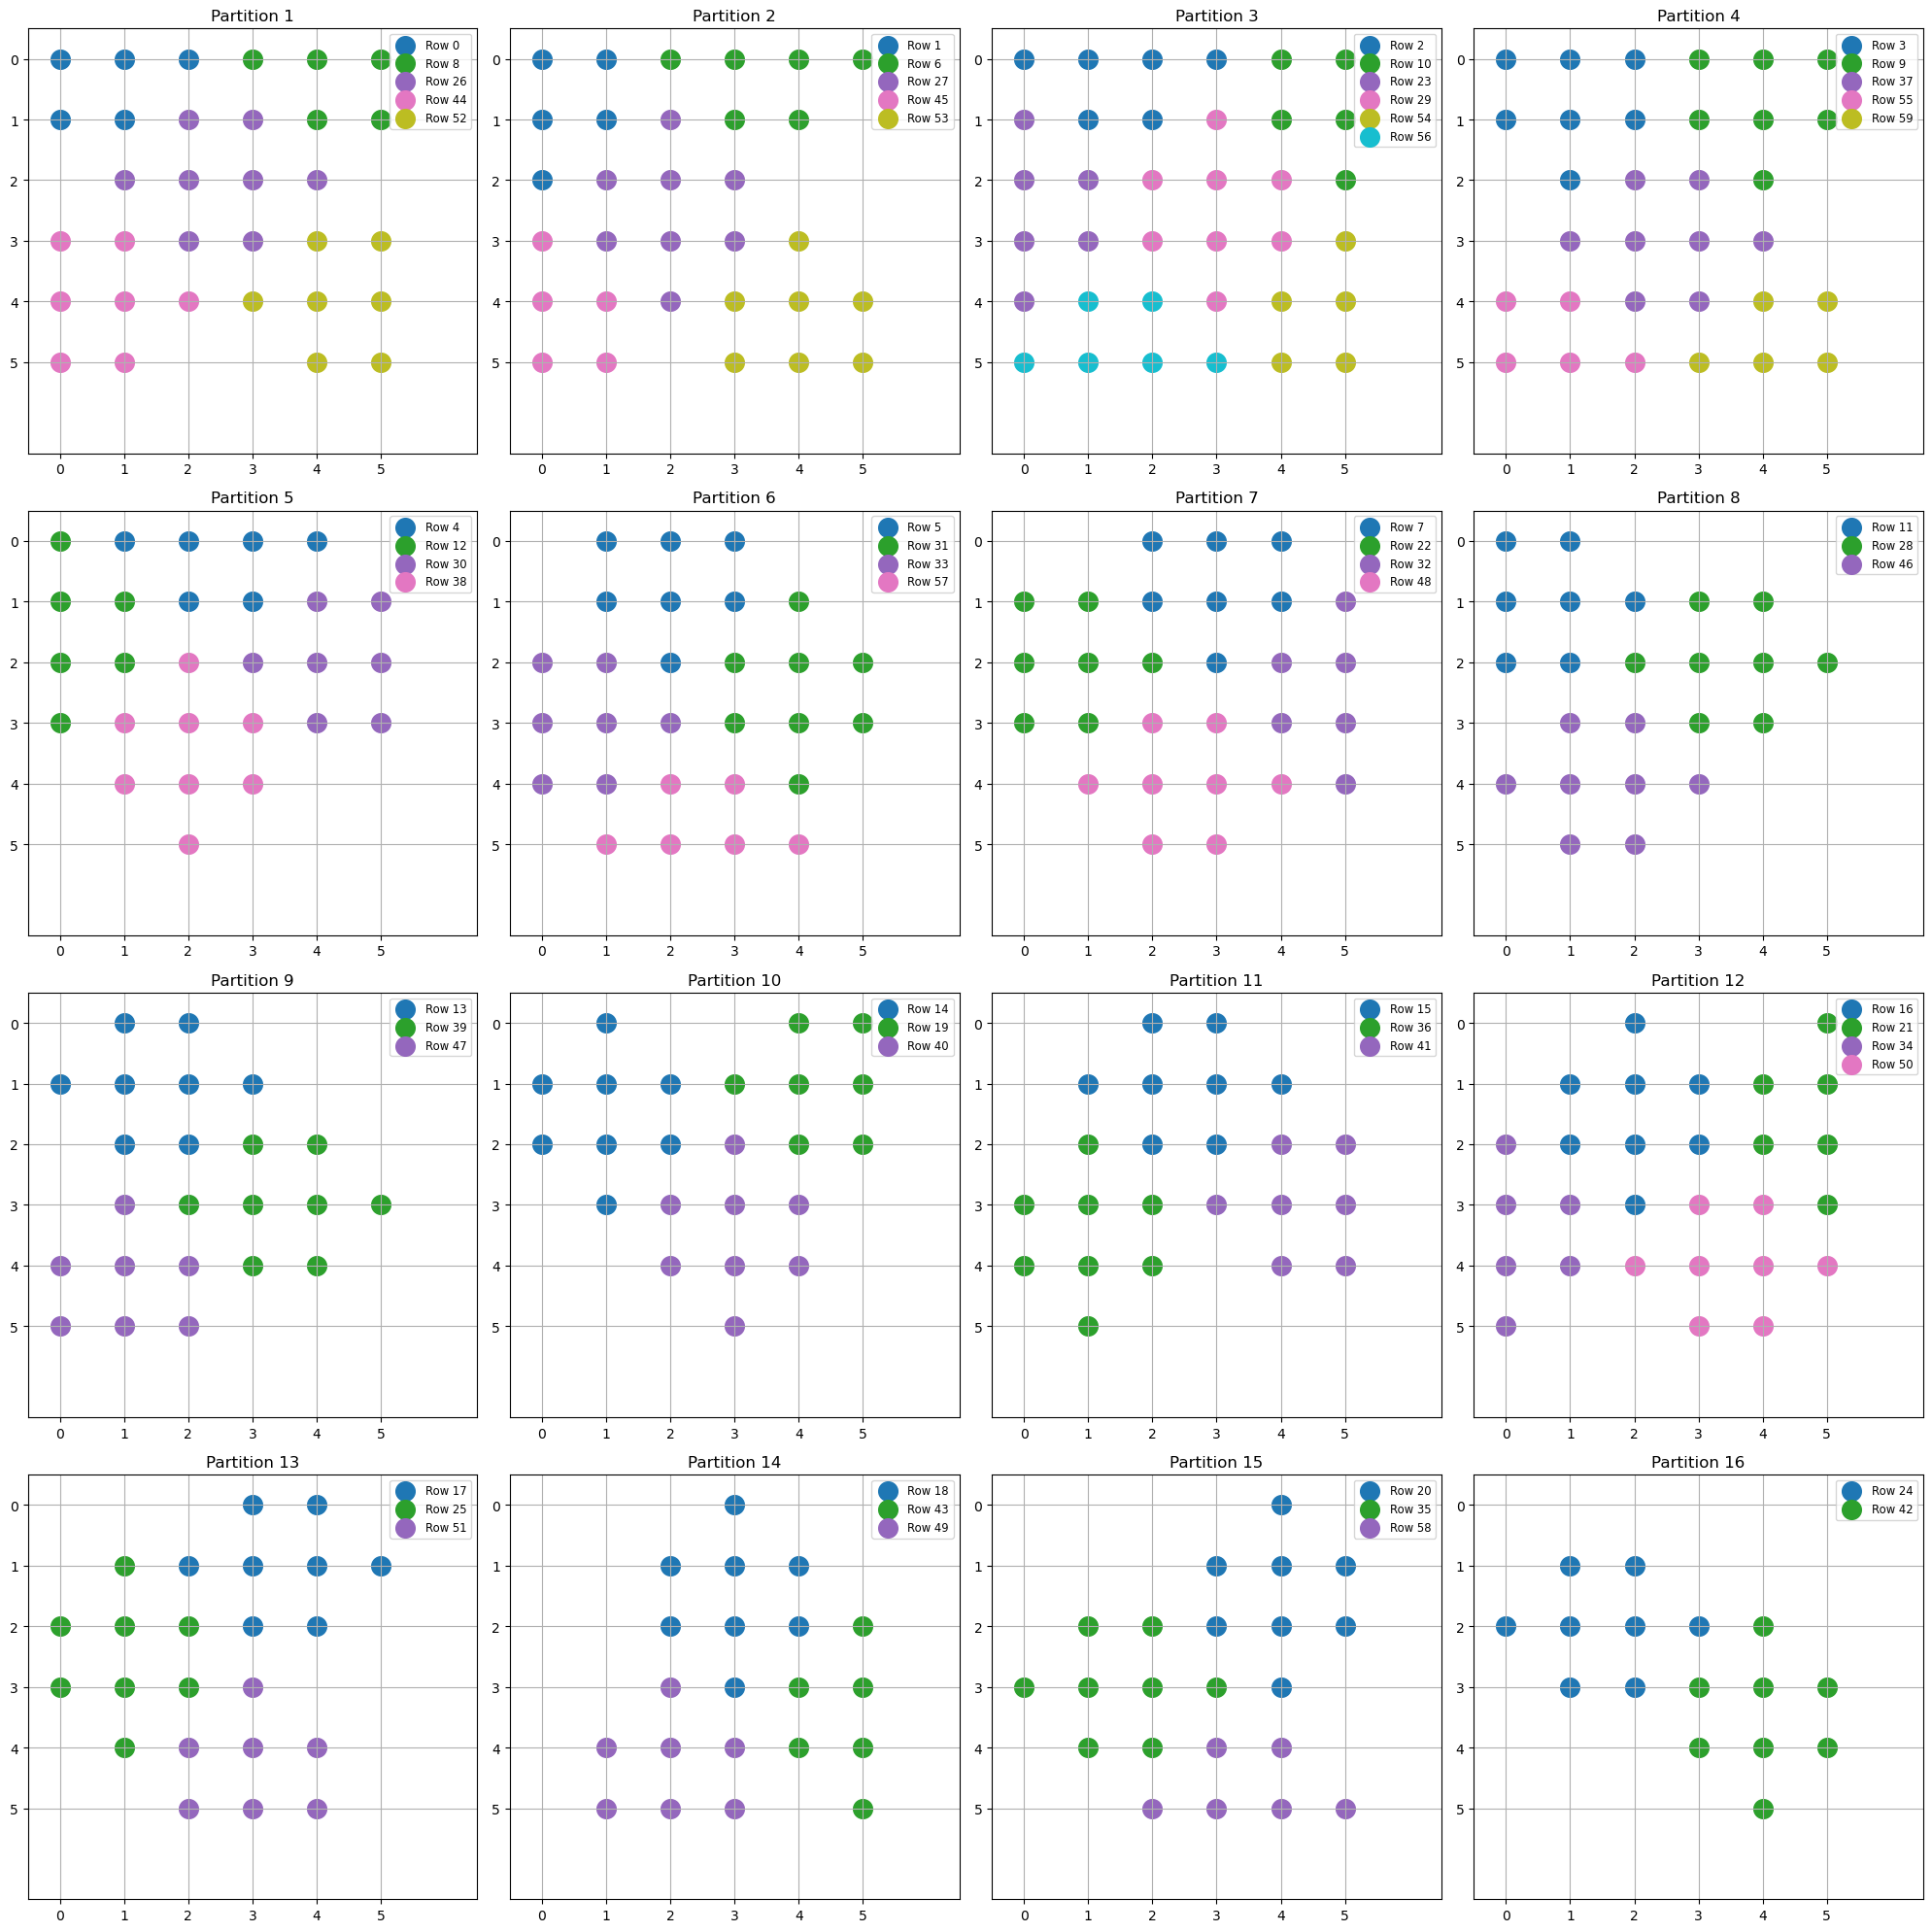

In [47]:

# create subplots
fig, axs = plt.subplots(4, 4, figsize=(20, 20))  
# create a color map for each partition
colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in row_indices))  # 为行分配颜色
for i, (ax, indices) in enumerate(zip(axs.flat, row_indices)):
    plot_single_partition(ax, rows, indices, i + 1, colors,m,n)

plt.tight_layout()
plt.show()


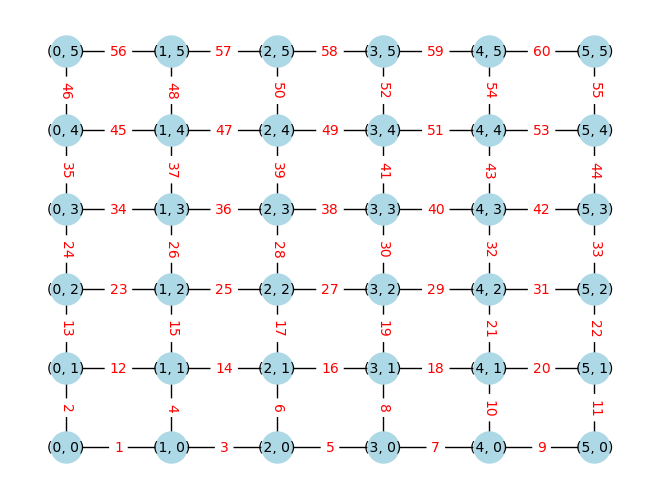

In [48]:
G = nx.Graph()
for y in range(n):
    for x in range(m):
        G.add_node((x, y))

# add edges and labels
edge_id = 1
for y in range(n):
    for x in range(m):
        if x < m - 1:  
            G.add_edge((x, y), (x + 1, y), label=f'{edge_id}')
            edge_id += 1
        if y < n - 1:  
            G.add_edge((x, y), (x, y + 1), label=f'{edge_id}')
            edge_id += 1

pos = {(x, y): (x, -y) for x in range(m) for y in range(n)}
labels = nx.get_edge_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
# plot the image
plt.gca().invert_yaxis()
plt.show()


In [49]:

mods = [
    (1, 1), (3, 3), (5, 5), (7, 7),
    (3, 7), (5, 1), (7, 3), (1, 5)
]
class_edges = generate_classes(m, n,mods=mods) # generate_classes(m, n, G): in tfgraph.py
i=1
for edges in class_edges:
    print(f"Class {i}: Edges {edges}")
    i+=1

Class 1: Edges [0, 44, 26, 8, 52]
Class 2: Edges [2, 46, 28]
Class 3: Edges [22, 4, 48, 30]
Class 4: Edges [24, 6, 50]
Class 5: Edges [11, 55, 37, 19, 59]
Class 6: Edges [13, 56, 39]
Class 7: Edges [33, 15, 57, 41]
Class 8: Edges [35, 17, 58]
Class 9: Edges [1, 9, 27, 45, 53]
Class 10: Edges [12, 20, 38]
Class 11: Edges [5, 23, 31, 49]
Class 12: Edges [16, 34, 42]
Class 13: Edges [3, 10, 29, 47, 54]
Class 14: Edges [14, 21, 40]
Class 15: Edges [7, 25, 32, 51]
Class 16: Edges [18, 36, 43]


## Partition by observing the relationship of nodes in $\Delta$

/tmp/ipykernel_2216248/1121052173.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in class_edges))


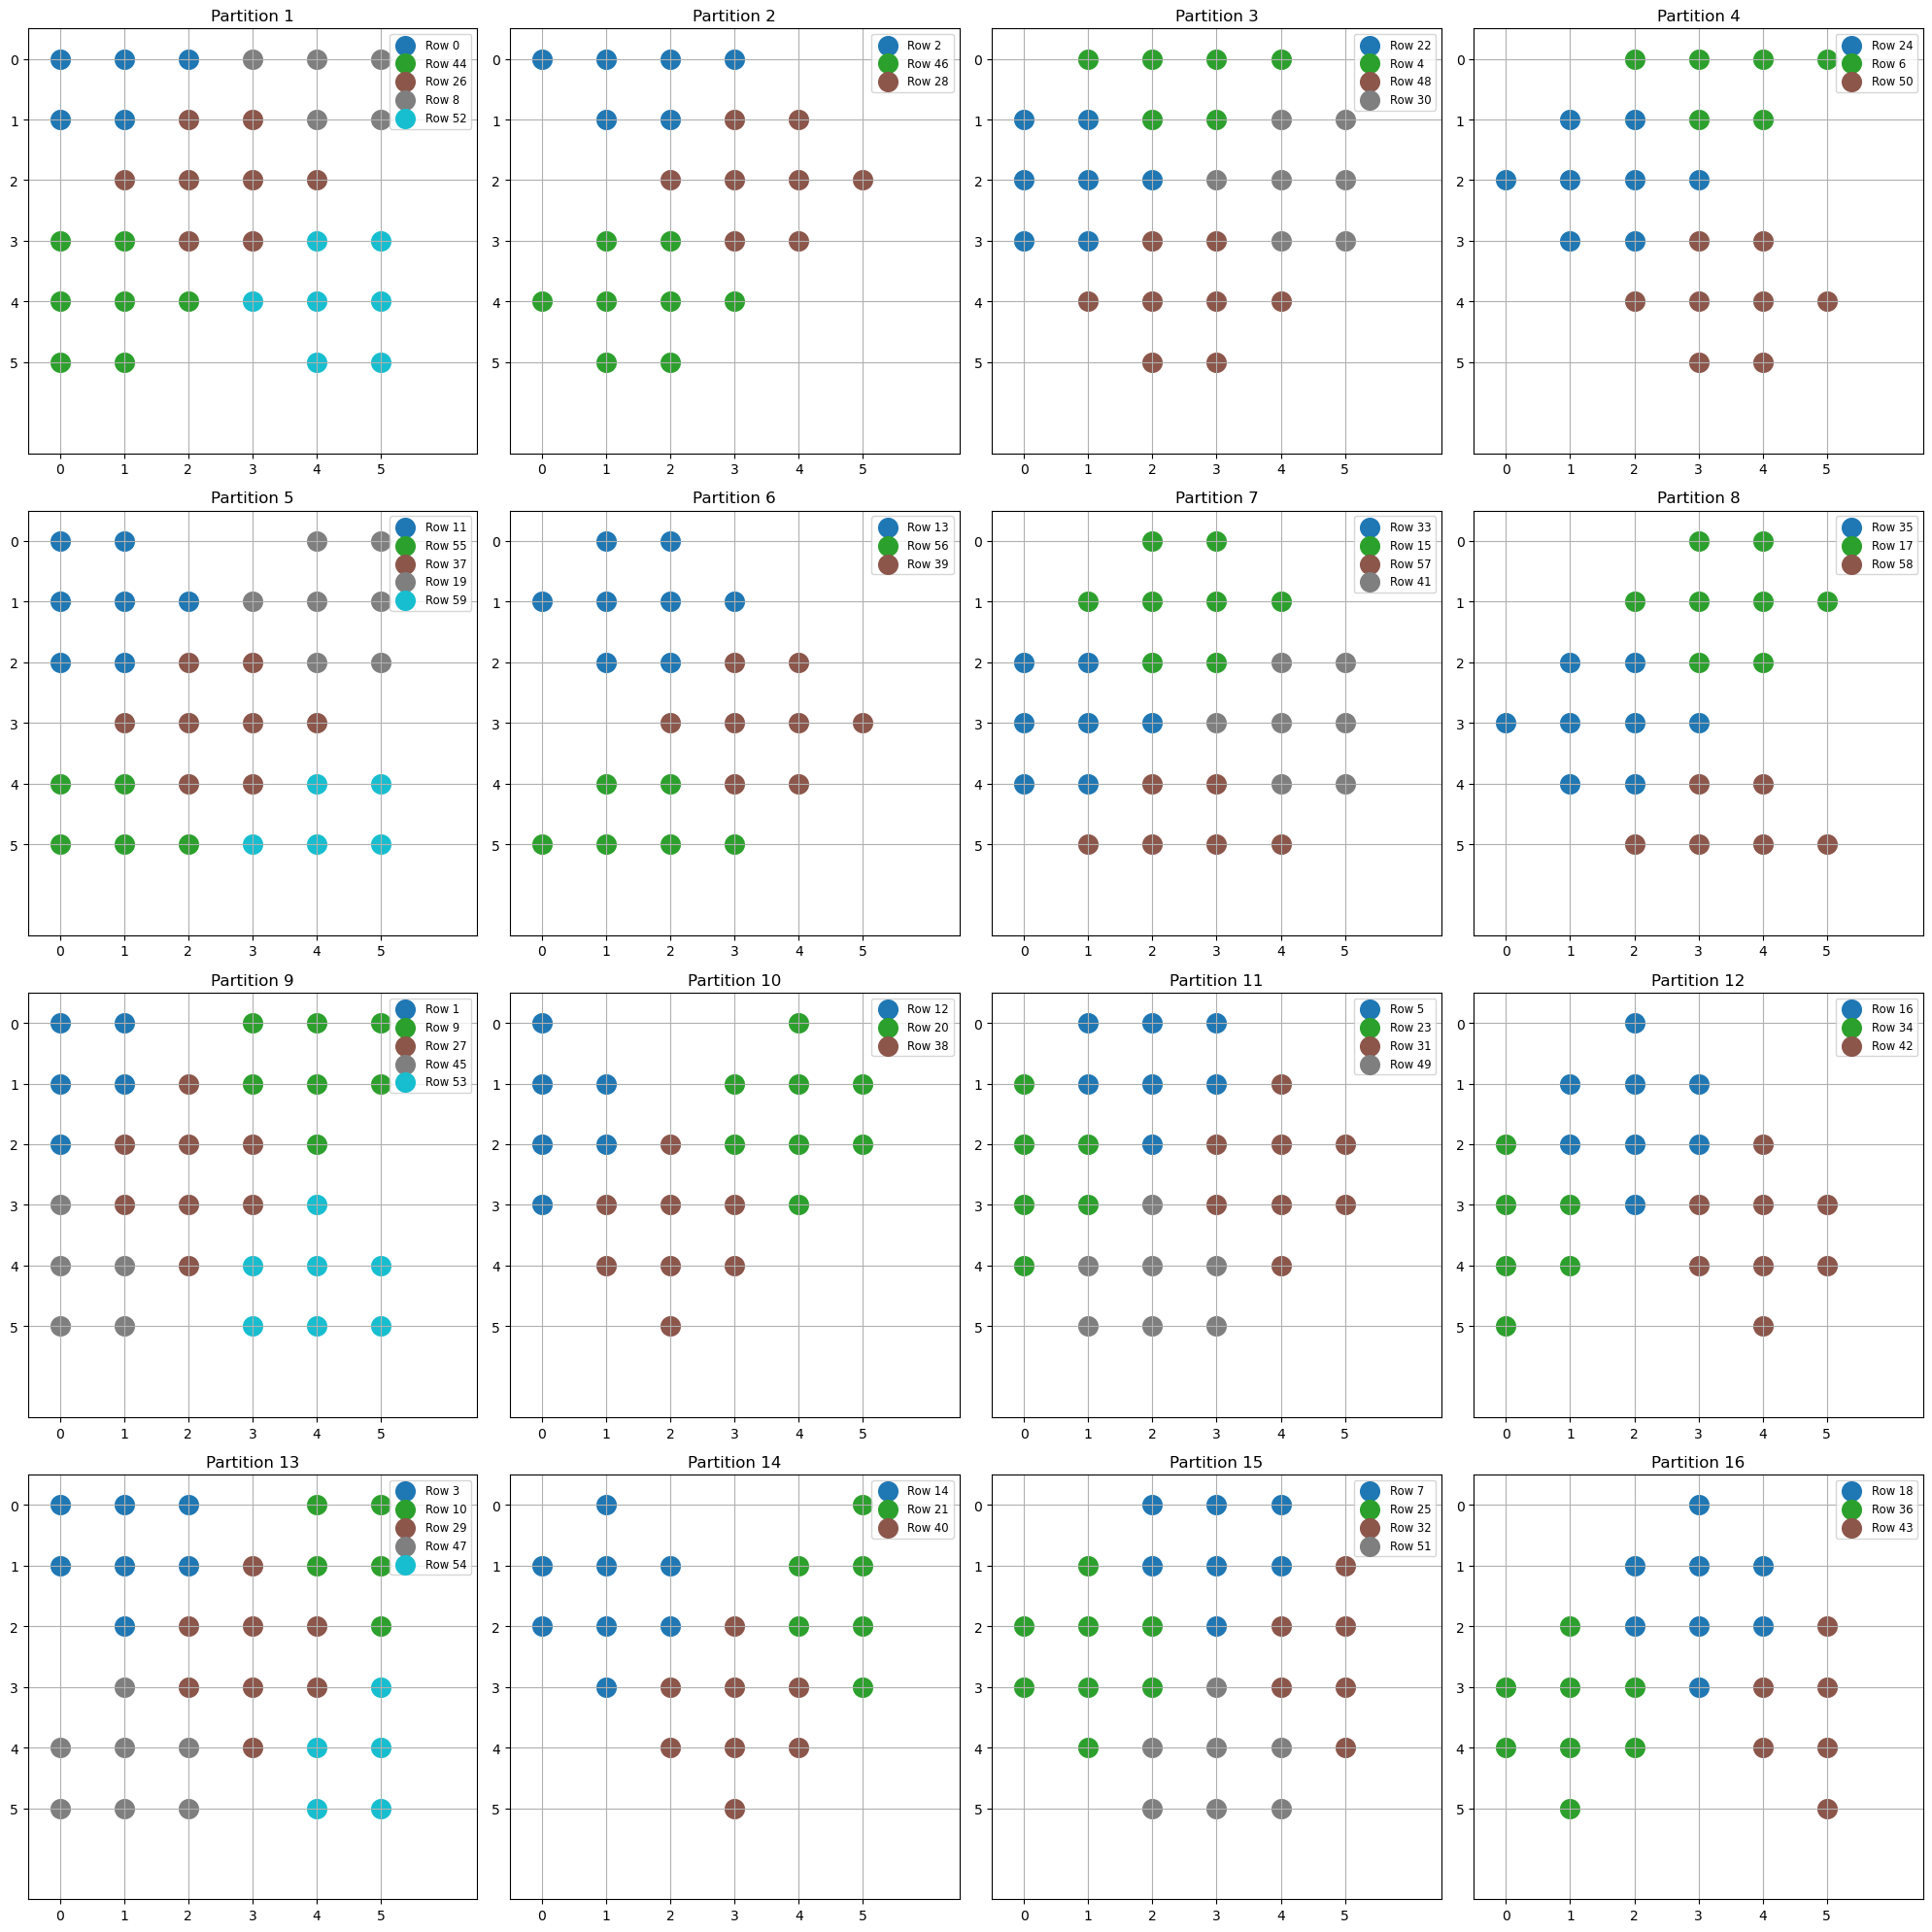

In [50]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))  
colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in class_edges))  

for i, (ax, indices) in enumerate(zip(axs.flat, class_edges)):
    plot_single_partition(ax, rows, indices, i + 1, colors,m,n)

plt.tight_layout()
plt.show()

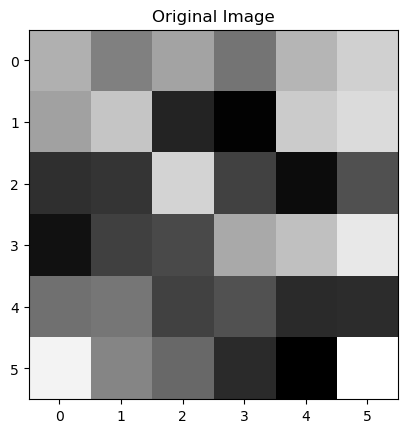

In [51]:
m=6
n=6
k=1
image = np.random.rand(m, n)  # 生成一个 mxn 的随机图片
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Generate L, D, \Delta
L = generate_L(image)
D = generate_D(image)
delta=generate_delta(D, L, k)

In [52]:
rows=[]
rows=print_nonzero_columns(delta)
rows #nonzero columns of delta

[[0, 1],
 [0, 6],
 [1, 2],
 [1, 7],
 [2, 3],
 [2, 8],
 [3, 4],
 [3, 9],
 [4, 5],
 [4, 10],
 [5, 11],
 [6, 7],
 [6, 12],
 [7, 8],
 [7, 13],
 [8, 9],
 [8, 14],
 [9, 10],
 [9, 15],
 [10, 11],
 [10, 16],
 [11, 17],
 [12, 13],
 [12, 18],
 [13, 14],
 [13, 19],
 [14, 15],
 [14, 20],
 [15, 16],
 [15, 21],
 [16, 17],
 [16, 22],
 [17, 23],
 [18, 19],
 [18, 24],
 [19, 20],
 [19, 25],
 [20, 21],
 [20, 26],
 [21, 22],
 [21, 27],
 [22, 23],
 [22, 28],
 [23, 29],
 [24, 25],
 [24, 30],
 [25, 26],
 [25, 31],
 [26, 27],
 [26, 32],
 [27, 28],
 [27, 33],
 [28, 29],
 [28, 34],
 [29, 35],
 [30, 31],
 [31, 32],
 [32, 33],
 [33, 34],
 [34, 35]]

In [53]:
from collections import Counter
all_elements = [item for sublist in rows for item in sublist]

# 使用 Counter 统计每个元素的出现次数
counter = Counter(all_elements)

# 输出出现次数最多的元素
most_common = counter.most_common(1)
print(f"最常出现的元素是: {most_common[0][0]}, 出现次数: {most_common[0][1]}")

最常出现的元素是: 7, 出现次数: 4


In [54]:
def generate_classes_0(m, n, mods):
    # Step 1: Generate the grid dimensions
    grid_row = 2 * m 
    grid_col = 2 * n 

    # Step 2: Generate the graph
    G = nx.Graph()
    for y in range(n):
        for x in range(m):
            G.add_node((x, y))
    # add edges and labels
    edge_id = 1
    for y in range(n):
        for x in range(m):
            if x < m - 1:  
                G.add_edge((x, y), (x + 1, y), label=f'{edge_id}')
                edge_id += 1
            if y < n - 1:  
                G.add_edge((x, y), (x, y + 1), label=f'{edge_id}')
                edge_id += 1

    classification = [[] for _ in range(4)]  # Initialize a list for each class
    
    for i in range(grid_row):
        for j in range(grid_col):
            mod_pair = ((i+j)%4, (i-j)%4)
            if mod_pair in mods:
                class_label = mods.index(mod_pair) + 1
                temp_k = (i - 1) // 2
                temp_l = j // 2
                
                if 0 <= temp_k < m and 0 <= temp_l < n :# and temp_k + 1 < m
                    classification[class_label - 1].append((temp_k, temp_l))
    class_edges = []
    for class_idx, class_points in enumerate(classification[:2]):
        edges = []
        for (x, y) in class_points:
            # if (x + 1, y) in G:
            if G.has_edge((x, y), (x + 1, y)):
                edge_number = int(G[(x, y)][(x + 1, y)]['label'])-1
                edges.append(edge_number)
        class_edges.append(edges) 
    for class_idx, class_points in enumerate(classification[2:4], start=8):
        edges = []
        for (x, y) in class_points:
            # if (x , y+1) in G:
            if G.has_edge((x, y), (x, y + 1)):
                edge_number = int(G[(x, y)][(x, y + 1)]['label'])-1
                edges.append(edge_number)
        class_edges.append(edges)    
    return class_edges, classification


In [55]:
mods = [
    (1, 1), (1,3),(3,1),(3,3)
]
class_edges,classification = generate_classes_0(m, n,mods=mods) # generate_classes(m, n, G): in tfgraph.py
i=1
for edges in class_edges:
    print(f"Class {i}: Edges {edges}")
    
    i+=1
for i, class_points in enumerate(classification):
    print(f"Class {i + 1}: Points {class_points}")

Class 1: Edges [0, 22, 44, 13, 35, 56, 4, 26, 48, 17, 39, 58, 8, 30, 52]
Class 2: Edges [11, 33, 55, 2, 24, 46, 15, 37, 57, 6, 28, 50, 19, 41, 59]
Class 3: Edges [1, 23, 45, 14, 36, 5, 27, 49, 18, 40, 9, 31, 53]
Class 4: Edges [12, 34, 3, 25, 47, 16, 38, 7, 29, 51, 20, 42, 10, 32, 54]
Class 1: Points [(0, 0), (0, 2), (0, 4), (1, 1), (1, 3), (1, 5), (2, 0), (2, 2), (2, 4), (3, 1), (3, 3), (3, 5), (4, 0), (4, 2), (4, 4), (5, 1), (5, 3), (5, 5)]
Class 2: Points [(0, 1), (0, 3), (0, 5), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (2, 5), (3, 0), (3, 2), (3, 4), (4, 1), (4, 3), (4, 5)]
Class 3: Points [(0, 0), (0, 2), (0, 4), (1, 1), (1, 3), (1, 5), (2, 0), (2, 2), (2, 4), (3, 1), (3, 3), (3, 5), (4, 0), (4, 2), (4, 4)]
Class 4: Points [(0, 1), (0, 3), (0, 5), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (2, 5), (3, 0), (3, 2), (3, 4), (4, 1), (4, 3), (4, 5), (5, 0), (5, 2), (5, 4)]


/tmp/ipykernel_2216248/3426727949.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in class_edges))


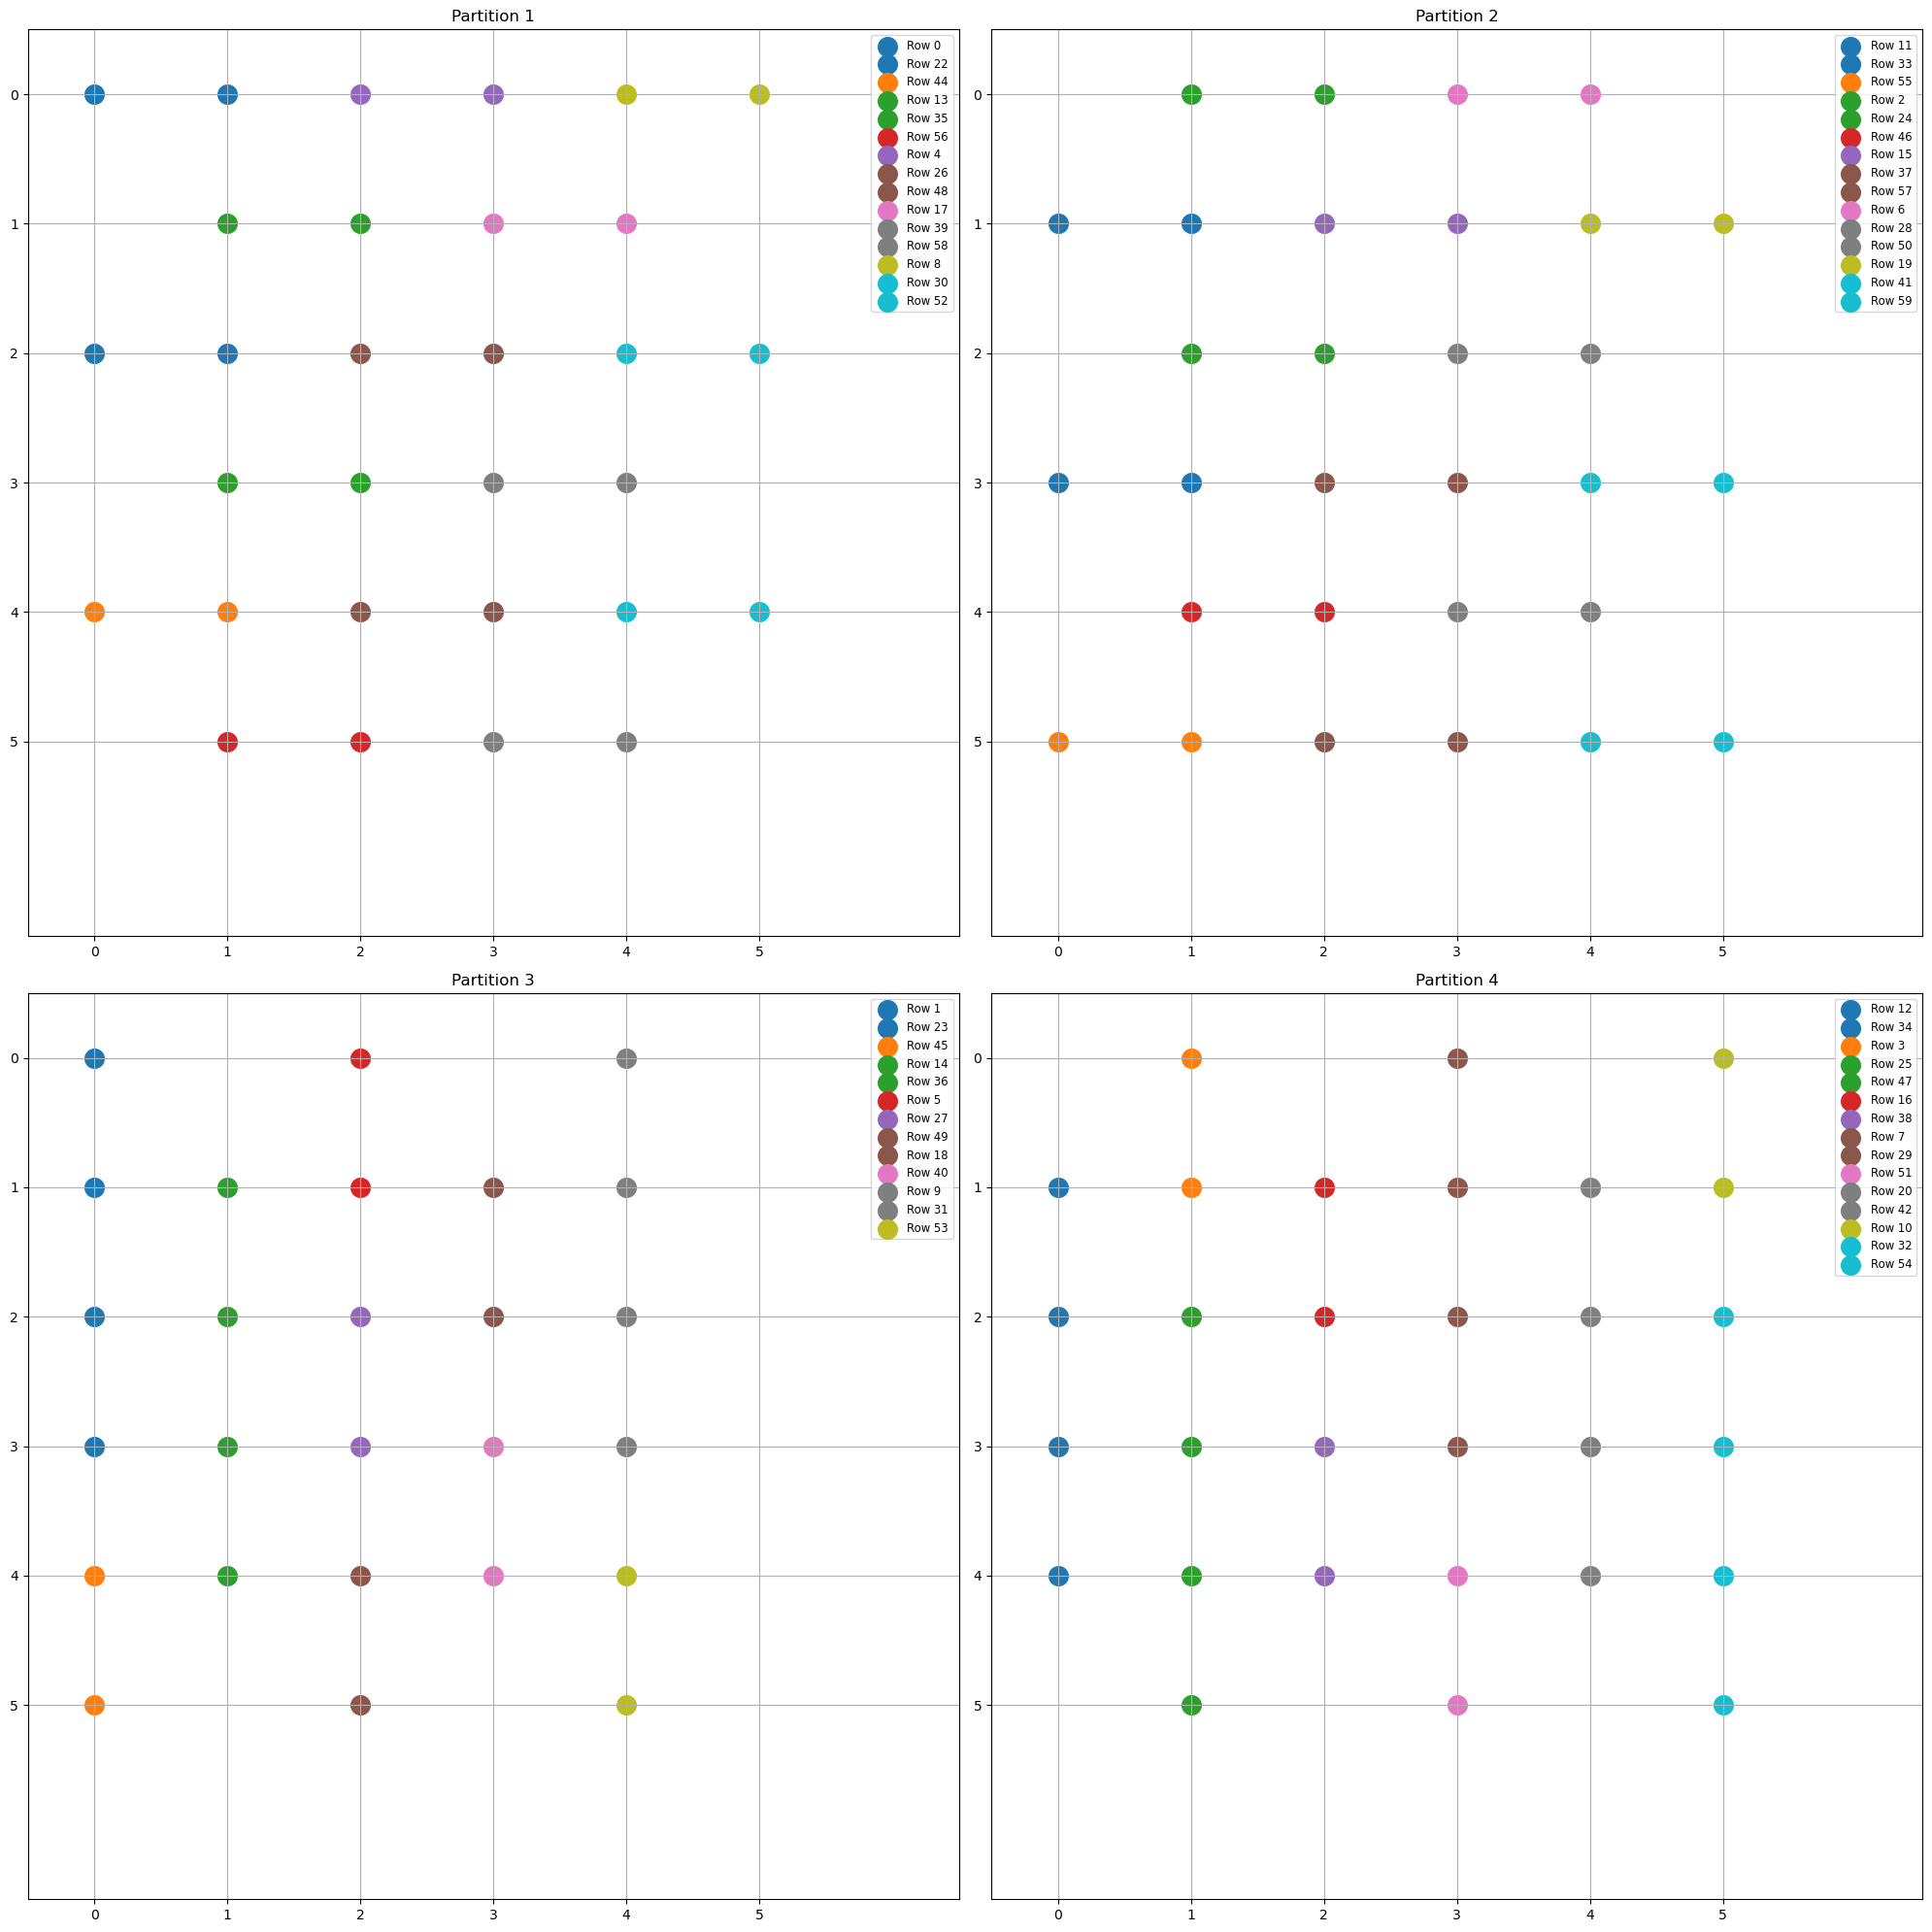

In [56]:
fig, axs = plt.subplots(2,2, figsize=(20, 20))  
colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in class_edges))  

for i, (ax, indices) in enumerate(zip(axs.flat, class_edges)):
    plot_single_partition(ax, rows, indices, i + 1, colors,m,n)

plt.tight_layout()
plt.show()

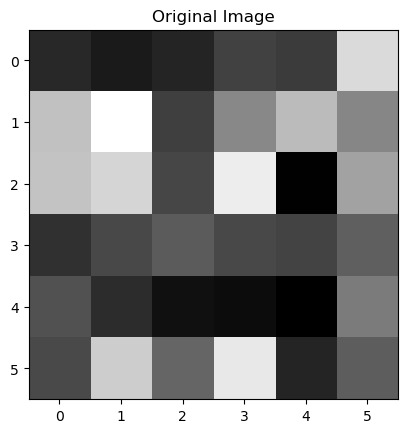

In [57]:
m=6
n=6
k=2
image = np.random.rand(m, n)  # 生成一个 mxn 的随机图片
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

# Generate L, D, \Delta
L = generate_L(image)
D = generate_D(image)
delta=generate_delta(D, L, k)

In [58]:
rows=[]
rows=print_nonzero_columns(delta)
rows #nonzero columns of delta

[[0, 1, 6],
 [0, 1, 2, 7],
 [1, 2, 3, 8],
 [2, 3, 4, 9],
 [3, 4, 5, 10],
 [4, 5, 11],
 [0, 6, 7, 12],
 [1, 6, 7, 8, 13],
 [2, 7, 8, 9, 14],
 [3, 8, 9, 10, 15],
 [4, 9, 10, 11, 16],
 [5, 10, 11, 17],
 [6, 12, 13, 18],
 [7, 12, 13, 14, 19],
 [8, 13, 14, 15, 20],
 [9, 14, 15, 16, 21],
 [10, 15, 16, 17, 22],
 [11, 16, 17, 23],
 [12, 18, 19, 24],
 [13, 18, 19, 20, 25],
 [14, 19, 20, 21, 26],
 [15, 20, 21, 22, 27],
 [16, 21, 22, 23, 28],
 [17, 22, 23, 29],
 [18, 24, 25, 30],
 [19, 24, 25, 26, 31],
 [20, 25, 26, 27, 32],
 [21, 26, 27, 28, 33],
 [22, 27, 28, 29, 34],
 [23, 28, 29, 35],
 [24, 30, 31],
 [25, 30, 31, 32],
 [26, 31, 32, 33],
 [27, 32, 33, 34],
 [28, 33, 34, 35],
 [29, 34, 35]]

In [59]:
from collections import Counter
all_elements = [item for sublist in rows for item in sublist]
counter = Counter(all_elements)
most_common = counter.most_common(1)
print(f"最常出现的元素是: {most_common[0][0]}, 出现次数: {most_common[0][1]}")

最常出现的元素是: 7, 出现次数: 5


In [60]:
def generate_classes_1(m, n, mods):
    # Step 1: Generate the grid dimensions
    grid_row = m
    grid_col = n

    # Step 2: Generate the graph
    G = nx.Graph()
    for y in range(n):
        for x in range(m):
            G.add_node((x, y))
    # add edges and labels
    edge_id = 1
    for y in range(n):
        for x in range(m):
            if x < m - 1:  
                G.add_edge((x, y), (x + 1, y), label=f'{edge_id}')
                edge_id += 1
            if y < n - 1:  
                G.add_edge((x, y), (x, y + 1), label=f'{edge_id}')
                edge_id += 1

    classification = [[] for _ in range(5)]  # Initialize a list for each class
    rows = [[] for _ in range(5)]
    for i in range(grid_row):
        for j in range(grid_col):
            mod_pair = ((2*i+j)%5, (i-2*j)%5)
            if mod_pair in mods:
                class_label = mods.index(mod_pair) + 1
                temp_k = i
                temp_l = j
                
                if 0 <= temp_k < m and 0 <= temp_l < n:# and temp_k + 1 < m:
                    classification[class_label - 1].append((temp_k, temp_l))
                    node_index = temp_l * m + temp_k
                    rows[class_label - 1].append(node_index)
    return rows


In [61]:
mods = [
    (0, 0), (2,1),(4,2),(1,3),(3,4)
]
class_edges = generate_classes_1(m, n,mods=mods) # generate_classes(m, n, G): in tfgraph.py
i=1
for edges in class_edges:
    print(f"Class {i}: Edges {edges}")
    i+=1

Class 1: Edges [0, 30, 19, 8, 27, 16, 5, 35]
Class 2: Edges [12, 1, 31, 20, 9, 28, 17]
Class 3: Edges [24, 13, 2, 32, 21, 10, 29]
Class 4: Edges [6, 25, 14, 3, 33, 22, 11]
Class 5: Edges [18, 7, 26, 15, 4, 34, 23]


/tmp/ipykernel_2216248/2518993497.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in class_edges))


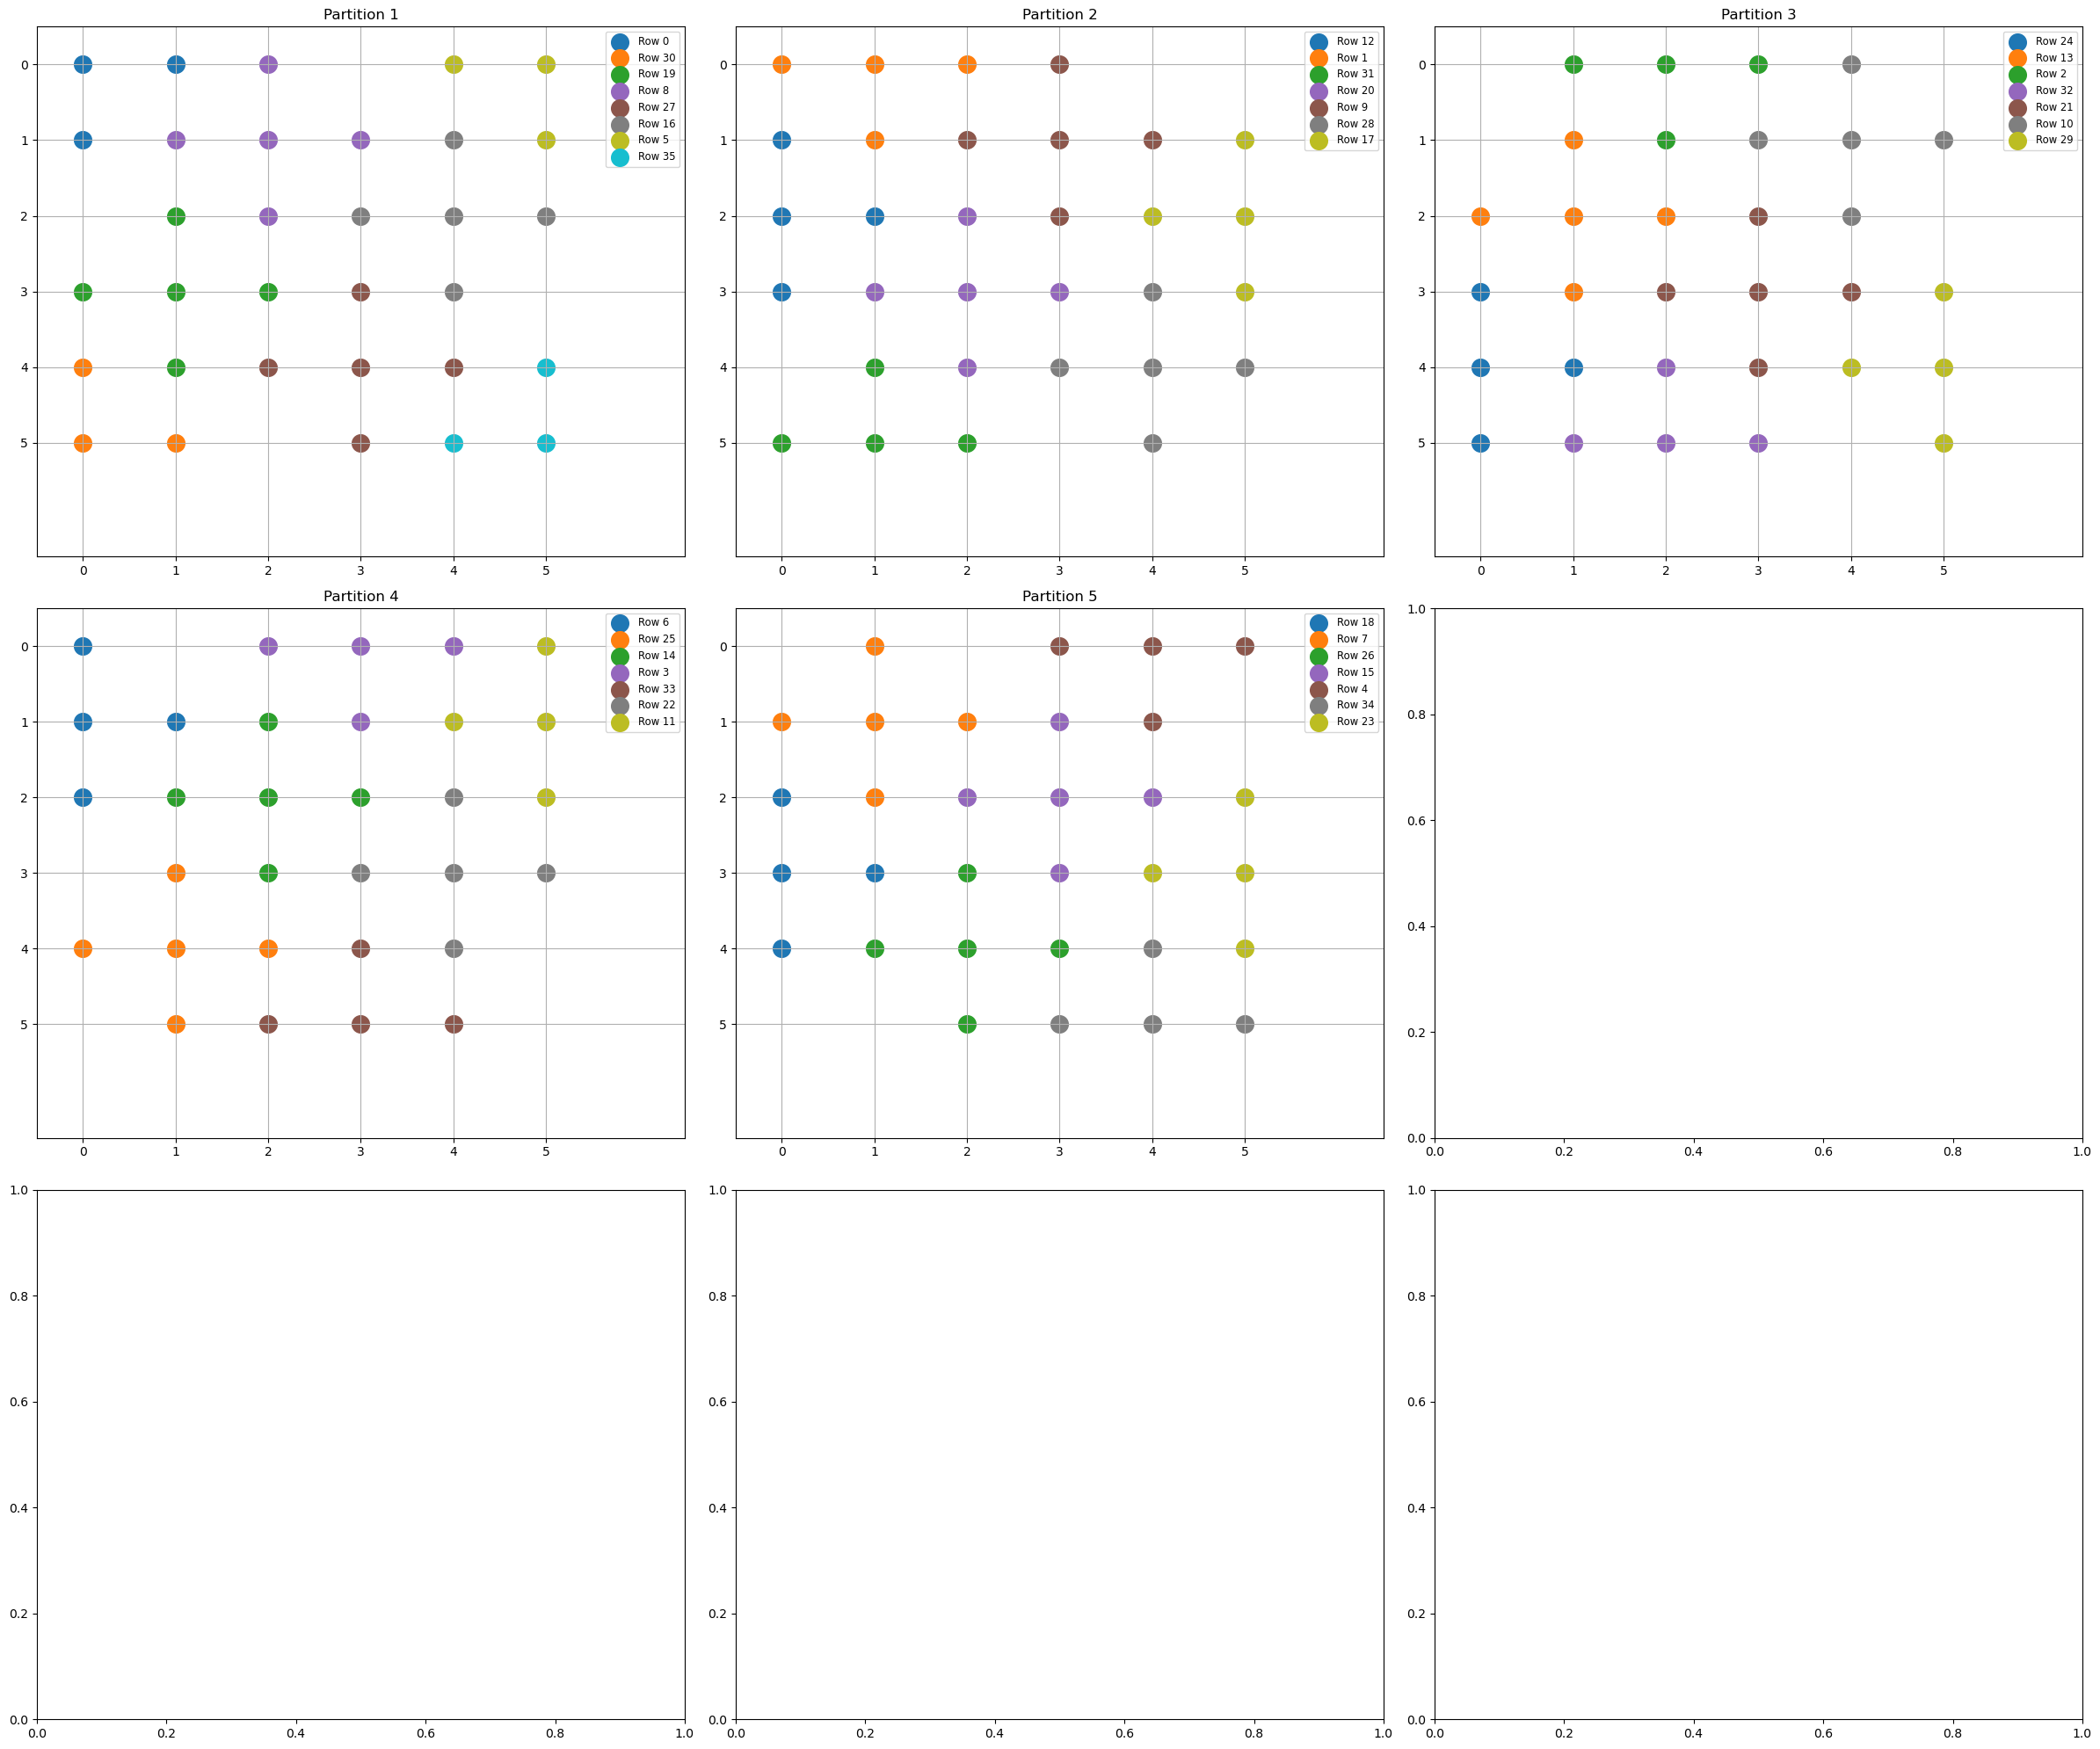

In [62]:
fig, axs = plt.subplots(3,3, figsize=(24, 20))  
colors = plt.cm.get_cmap('tab10', max(len(indices) for indices in class_edges))  

for i, (ax, indices) in enumerate(zip(axs.flat, class_edges)):
    plot_single_partition(ax, rows, indices, i + 1, colors,m,n)

plt.tight_layout()
plt.show()